<a href="https://colab.research.google.com/github/MlMauriciolopes/Testes-machine-learning/blob/main/yfinance_comparar_carteiras_de_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 41.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from functools import reduce

In [6]:
# Construção da carteira 1
# Criando os objetos que determinarão a data de início e fim da extração de dados

inicio = '2020-01-05'
fim = '2021-12-05'

In [7]:
# Criar uma lista com os ativos de nossa carteira.
# OBS: ".SA" para ativos brasileiros

ativos01 = ['ITUB4.SA','VALE3.SA','MGLU3.SA','PETR4.SA',
          'BBDC4.SA','B3SA3.SA','ABEV3.SA','BPAC11.SA',
          'BBAS3.SA','CSAN3.SA','RENT3.SA','LREN3.SA']

In [8]:
# Obter os dados dos ativos

precos = yf.download(ativos01, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [9]:
# Começando a contrução da carteira 01
# Criando uma estrutura de dicionário, onde cada papel terá o seu valor correspondente em R$:

compras = {'ITUB4.SA': 1200,'VALE3.SA': 1200,'MGLU3.SA': 1000,'PETR4.SA': 1000,
          'BBDC4.SA': 1000,'B3SA3.SA': 900,'ABEV3.SA': 800,'BPAC11.SA': 700,
          'BBAS3.SA': 600,'CSAN3.SA': 600,'RENT3.SA': 500,'LREN3.SA': 500}

compras_df = pd.Series(data=compras, index=list(compras.keys()))

In [10]:
# Vamos comfirmar o investimento em nossa carteira

sum(compras.values())

10000

In [11]:
# Determinar o número de papéis que teríamos comprado no primeiro dia dos investimentos.
# Repare que isso é um dado aproximado pois,não dá para comprar números quebrados de ativos
compras_df/precos.iloc[0]

ABEV3.SA     45.071798
B3SA3.SA     68.193816
BBAS3.SA     12.687965
BBDC4.SA     32.099785
BPAC11.SA    38.330470
CSAN3.SA     34.709409
ITUB4.SA     34.446273
LREN3.SA      9.126538
MGLU3.SA     83.806919
PETR4.SA     39.935681
RENT3.SA     10.503524
VALE3.SA     27.432887
dtype: float64

In [12]:
# Uma vez que sabemos o número de papéis comprados de cada ativo
# Podemos calcular o valor teórico (R$) que teríamos na nossa carteira dia após dia
# Simplesmente multiplicando o número de papéis por suas cotações diárias

PL01 = precos*compras_df/(precos.iloc[0])
PL01


,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA
Date,,,,,,,,,,,,
2020-01-06,800.000000,900.000000,600.000000,1000.000000,700.000000,600.000000,1200.000000,500.000000,1000.000000,1000.000000,500.000000,1200.000000
2020-01-07,801.682387,929.038770,595.471723,982.627637,702.792859,610.816105,1172.160625,499.737112,997.138783,996.105135,504.862343,1208.729749
2020-01-08,797.896888,926.549827,590.037674,967.426820,696.564362,600.743128,1153.062118,502.979849,1027.794946,989.938385,502.379464,1208.953487
2020-01-09,791.587723,926.134906,578.037774,951.954406,701.305444,594.303038,1130.078576,499.123603,1064.377751,986.692651,505.069253,1193.060885
2020-01-10,794.532029,918.875213,564.452846,934.581982,711.159445,603.137556,1120.043266,500.701104,1058.655317,982.473220,495.034082,1194.404044
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,708.810737,770.903147,388.793735,640.922842,816.612029,732.977022,778.320208,262.743101,673.807628,1047.664170,547.560234,1906.585613
2021-11-30,696.664628,744.759396,401.791392,629.539923,783.249940,725.128596,768.702823,258.294443,653.693987,1046.242205,535.613469,1918.930328
2021-12-01,687.988860,738.056010,394.977100,627.010392,787.041110,724.104834,763.809540,256.841822,576.591615,1052.285785,528.277743,1926.611712


In [13]:
# Para calcular o valor diário da nossa carteira, basta somar todas as posições
# Criando a coluna "Carteira 01" que vai receber justamente o resultado dessa operação 

PL01['Carteira 01'] = PL01.sum(axis = 1)

In [15]:
# Replicar o passo a passo  para as carteiras 02 e 03

# Carteira 02

ativos02 = ['BPAN4.SA','VALE3.SA','WEGE3.SA','TOTS3.SA','BPAC11.SA',
            'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA','TSLA34.SA']

precos02 = yf.download(ativos02, start = inicio, end = fim)['Adj Close']

compras02 = {'BPAN4.SA': 1500,'VALE3.SA': 1400,'WEGE3.SA': 1300,'TOTS3.SA': 1200,'BPAC11.SA': 1100,
            'KNRI11.SA': 1000,'SMAL11.SA': 800,'AAPL34.SA': 700,'IVVB11.SA': 500,'TSLA34.SA': 500}
          
compras_df02 = pd.Series(data=compras02, index=list(compras02.keys()))

PL02 = precos02*(compras_df02/(precos02.iloc[0]))

PL02['Carteira 02'] = PL02.sum(axis = 1)

PL02


[*********************100%***********************]  10 of 10 completed


,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,Carteira 02
Date,,,,,,,,,,,
2020-01-06,700.000000,1100.000000,1500.000000,500.000000,1000.000000,800.000000,1200.000000,500.000000,1400.000000,1300.000000,10000.000000
2020-01-07,701.718758,1104.388663,1498.708234,500.000000,1003.889303,801.725307,1205.042987,522.959745,1410.184830,1310.062885,10058.680712
2020-01-08,707.619885,1094.601140,1485.788219,500.000000,947.065381,794.823815,1188.871541,529.412395,1410.445980,1260.493211,9919.121566
2020-01-09,728.760736,1102.051413,1485.788219,500.000000,914.233781,798.274605,1208.520675,529.412395,1391.904610,1241.857525,9900.803958
2020-01-10,731.854607,1117.536385,1475.452260,500.000000,903.626618,801.725307,1199.478504,531.011952,1393.471507,1267.201655,9921.358794
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,2098.526462,1283.247475,1580.206235,1912.457912,644.762119,636.089108,1699.804143,8690.750592,2224.350076,2461.048781,23231.242903
2021-11-30,2146.902011,1230.821334,1510.451907,1889.225507,644.610595,625.736870,1676.004829,8662.894254,2238.752245,2447.380529,23072.780081
2021-12-01,2202.720226,1236.778886,1467.525976,1878.787879,647.540154,614.809471,1576.576320,8487.486257,2247.713861,2467.123852,22827.062882


In [16]:
# Carteira 03
ativos03 = ['IVVB11.SA','GOGL34.SA','COCA34.SA','MSFT34.SA','WEGE3.SA',
            'VALE3.SA','PETR4.SA','SUZB3.SA','JBSS3.SA']

precos03 = yf.download(ativos03, start = inicio, end = fim)['Adj Close']

compras03 = {'IVVB11.SA': 1500,'GOGL34.SA': 1500,'COCA34.SA': 1000,'MSFT34.SA': 1000,'WEGE3.SA': 1000,
            'VALE3.SA': 1000,'PETR4.SA': 1000,'SUZB3.SA': 1000,'JBSS3.SA': 1000}

compras_df03 = pd.Series(data=compras03, index=list(compras03.keys()))

PL03 = precos03*(compras_df03/precos03.iloc[0])

PL03['Carteira 03'] = PL03.sum(axis = 1)

PL03

[*********************100%***********************]  9 of 9 completed


,COCA34.SA,GOGL34.SA,IVVB11.SA,JBSS3.SA,MSFT34.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,Carteira 03
Date,,,,,,,,,,
2020-01-06,1000.000000,1500.000000,1500.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000
2020-01-07,1000.000000,1504.675097,1500.000000,1017.897107,993.784174,996.105211,1012.814064,1007.274704,1007.741018,10040.291375
2020-01-08,999.504828,1509.218623,1500.000000,1042.878408,1007.437555,989.938309,1063.331664,1007.461239,969.610046,10089.380673
2020-01-09,999.504828,1534.240491,1500.000000,1055.555637,1020.858876,986.692651,1060.620949,994.217492,955.275239,10106.966164
2020-01-10,1025.219460,1550.570627,1500.000000,1049.962848,1029.022893,982.473220,1062.345967,995.336704,974.770501,10169.702220
...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1444.175804,4324.978041,5737.373737,1451.765098,2990.033273,1047.664170,1371.857936,1588.821344,1893.114659,21849.784063
2021-11-30,1402.817123,4208.033391,5667.676521,1490.222529,2922.361947,1046.242205,1383.932869,1599.108607,1882.600618,21602.995810
2021-12-01,1433.626278,4251.887672,5636.363636,1420.414058,2969.618642,1052.285785,1430.507586,1605.509760,1897.787791,21698.001210


In [22]:
# Agora que as tabelas das três carteiras estão prontas, vamos capturar os dados do IBOV
# E fazer algumas transformações no data frame

ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [23]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [24]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)


In [25]:
# Juntar todos os data frames que criamos em um data frame só
# Utilizando o módulo "reduce" da biblioteca "functools"

# Primeiro, criamos uma lista contendo o nome dos data frames que vamos juntar (join)
# Depois, utilizar a função reduce para realizar a operação de join com todos os frames de uma vez

dfs = [PL01, PL02, PL03, ibov]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'),dfs)

In [27]:
# OBS: Valores mostrados em R$.
# Para comparar as carteiras com o IBOV, precisamos normalizar o data frame ...
# para colocá-lo na mesma escala, isto é, começando em 1
df_final.head(5)

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA_x,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA_x,RENT3.SA,VALE3.SA_x,Carteira 01,AAPL34.SA,BPAC11.SA_y,BPAN4.SA,IVVB11.SA_x,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA_y,WEGE3.SA_x,Carteira 02,COCA34.SA,GOGL34.SA,IVVB11.SA_y,JBSS3.SA,MSFT34.SA,PETR4.SA_y,SUZB3.SA,VALE3.SA,WEGE3.SA_y,Carteira 03,IBOV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-06,800.000000,900.000000,600.000000,1000.000000,700.000000,600.000000,1200.000000,500.000000,1000.000000,1000.000000,500.000000,1200.000000,10000.000000,700.000000,1100.000000,1500.000000,500.0,1000.000000,800.000000,1200.000000,500.000000,1400.000000,1300.000000,10000.000000,1000.000000,1500.000000,1500.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000,116878.0
2020-01-07,801.682387,929.038770,595.471723,982.627637,702.792859,610.816105,1172.160625,499.737112,997.138783,996.105135,504.862343,1208.729749,10001.163227,701.718758,1104.388663,1498.708234,500.0,1003.889303,801.725307,1205.042987,522.959745,1410.184830,1310.062885,10058.680712,1000.000000,1504.675097,1500.0,1017.897107,993.784174,996.105211,1012.814064,1007.274704,1007.741018,10040.291375,116662.0
2020-01-08,797.896888,926.549827,590.037674,967.426820,696.564362,600.743128,1153.062118,502.979849,1027.794946,989.938385,502.379464,1208.953487,9964.326948,707.619885,1094.601140,1485.788219,500.0,947.065381,794.823815,1188.871541,529.412395,1410.445980,1260.493211,9919.121566,999.504828,1509.218623,1500.0,1042.878408,1007.437555,989.938309,1063.331664,1007.461239,969.610046,10089.380673,116247.0
2020-01-09,791.587723,926.134906,578.037774,951.954406,701.305444,594.303038,1130.078576,499.123603,1064.377751,986.692651,505.069253,1193.060885,9921.726012,728.760736,1102.051413,1485.788219,500.0,914.233781,798.274605,1208.520675,529.412395,1391.904610,1241.857525,9900.803958,999.504828,1534.240491,1500.0,1055.555637,1020.858876,986.692651,1060.620949,994.217492,955.275239,10106.966164,115947.0
2020-01-10,794.532029,918.875213,564.452846,934.581982,711.159445,603.137556,1120.043266,500.701104,1058.655317,982.473220,495.034082,1194.404044,9878.050104,731.854607,1117.536385,1475.452260,500.0,903.626618,801.725307,1199.478504,531.011952,1393.471507,1267.201655,9921.358794,1025.219460,1550.570627,1500.0,1049.962848,1029.022893,982.473220,1062.345967,995.336704,974.770501,10169.702220,115503.0


In [28]:
# Normalizar o frame inteiro

df_final_normalizado = df_final/df_final.iloc[0]

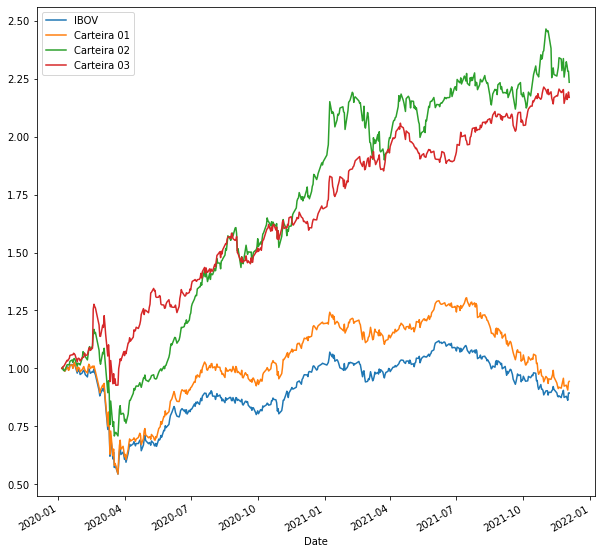

In [29]:
# Plotar apenas as colunas das três carteiras

df_final_normalizado[['IBOV','Carteira 01','Carteira 02','Carteira 03']].plot(figsize = (10,10));